<h3> It cleans (deletes everything) inside your Kaggle <code>/kaggle/working</code> directory.</h3>


In [1]:
import shutil
import os

working_dir = '/kaggle/working'

for item in os.listdir(working_dir):
    item_path = os.path.join(working_dir, item)
    try:
        if os.path.isfile(item_path) or os.path.islink(item_path):
            os.unlink(item_path)
        elif os.path.isdir(item_path):
            shutil.rmtree(item_path)
    except Exception as e:
        print(f"❌ Failed to delete {item_path}: {e}")

print("✅ All contents in /kaggle/working deleted.")


✅ All contents in /kaggle/working deleted.


<h2> Dataset Structure Exploration</h2>

<p>This script scans the main dataset folder, lists all subfolders (categories), and counts the number of images inside each subdirectory. Useful for verifying data organization before training.</p>


In [2]:
import os

# Path to your dataset directory
dataset_path = '/kaggle/input/kvasir-v2-a-gastrointestinal-tract-dataset/'

# List all folders in the dataset directory
folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]

# Loop through each folder
for folder in folders:
    folder_path = os.path.join(dataset_path, folder)
    
    # List all subdirectories in the current folder
    subdirectories = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]
    
    print(f"In folder '{folder}':")
    print(f"  Number of subdirectories: {len(subdirectories)}")
    
    # Loop through each subdirectory to count images
    for subdirectory in subdirectories:
        subdirectory_path = os.path.join(folder_path, subdirectory)
        
        # List all images in the subdirectory (assuming images are files)
        images = [img for img in os.listdir(subdirectory_path) if os.path.isfile(os.path.join(subdirectory_path, img))]
        
        print(f"    In subdirectory '{subdirectory}': {len(images)} images")


In folder 'dyed-lifted-polyps':
  Number of subdirectories: 1
    In subdirectory 'dyed-lifted-polyps': 1000 images
In folder 'normal-z-line':
  Number of subdirectories: 1
    In subdirectory 'normal-z-line': 1000 images
In folder 'dyed-resection-margins':
  Number of subdirectories: 1
    In subdirectory 'dyed-resection-margins': 1000 images
In folder 'normal-pylorus':
  Number of subdirectories: 1
    In subdirectory 'normal-pylorus': 1000 images
In folder 'normal-cecum':
  Number of subdirectories: 1
    In subdirectory 'normal-cecum': 1000 images
In folder 'polyps':
  Number of subdirectories: 1
    In subdirectory 'polyps': 1000 images
In folder 'ulcerative-colitis':
  Number of subdirectories: 1
    In subdirectory 'ulcerative-colitis': 1000 images
In folder 'esophagitis':
  Number of subdirectories: 1
    In subdirectory 'esophagitis': 1000 images


<h3>Flatten Kvasir Dataset from Nested Folders</h3>

<p>This script flattens the original Kvasir dataset, which has a nested folder structure, into a single combined folder. Each image is renamed with its class label as a prefix for easier supervised training.</p>


In [3]:
# Flatten Kvasir Dataset from Nested Folders
import os
import shutil

original_root = '/kaggle/input/kvasir-v2-a-gastrointestinal-tract-dataset'
combined_dir = '/kaggle/working/combined_dataset'
os.makedirs(combined_dir, exist_ok=True)

for folder in os.listdir(original_root):
    outer = os.path.join(original_root, folder)
    inner = os.path.join(outer, folder)

    if os.path.isdir(inner):
        for img in os.listdir(inner):
            src = os.path.join(inner, img)
            dst = os.path.join(combined_dir, f"{folder}_{img}")
            shutil.copy2(src, dst)

print("✅ Combined dataset created.")

✅ Combined dataset created.


<h3>Analyze Combined Dataset</h3>

<p>This step scans the combined dataset directory, counts the total number of images, computes the number of images per class label, and displays a few sample filenames. It ensures that the dataset flattening process was successful and verifies class balance before training.</p>


In [4]:
import os
from collections import defaultdict

combined_dir = '/kaggle/working/combined_dataset'

# Initialize counters
label_counts = defaultdict(int)
total_images = 0
sample_images = []

# Traverse all files
for fname in os.listdir(combined_dir):
    fpath = os.path.join(combined_dir, fname)
    
    if os.path.isfile(fpath):
        total_images += 1
        label = fname.split('_')[0]
        label_counts[label] += 1
        
        if len(sample_images) < 5:
            sample_images.append(fname)

# Print results
print(f"🖼️ Total images in combined dataset: {total_images}")
print("📊 Image count per label:")
for label, count in label_counts.items():
    print(f" - {label}: {count} images")

print("\n🔍 Sample images:")
for img in sample_images:
    print(f" - {img}")


🖼️ Total images in combined dataset: 8000
📊 Image count per label:
 - polyps: 1000 images
 - esophagitis: 1000 images
 - normal-z-line: 1000 images
 - normal-cecum: 1000 images
 - dyed-lifted-polyps: 1000 images
 - normal-pylorus: 1000 images
 - ulcerative-colitis: 1000 images
 - dyed-resection-margins: 1000 images

🔍 Sample images:
 - polyps_729409f2-b4fb-4a76-b177-da45a8cc792e.jpg
 - esophagitis_502b7045-d48e-472b-87fc-c7fda0e0f763.jpg
 - normal-z-line_016858b4-36f8-47d7-97ca-1570bcaba413.jpg
 - esophagitis_04461514-f778-4bad-b1a8-d2c3515d3b37.jpg
 - polyps_e82baf8c-55ea-4f08-91b9-3d83ef27798b.jpg


<h3>  Visualize Sample Images from Combined Dataset</h3>

<p>This step plots a few randomly selected images from the combined dataset to visually inspect the samples. It helps verify that the images are correctly labeled and properly flattened after preprocessing.</p>


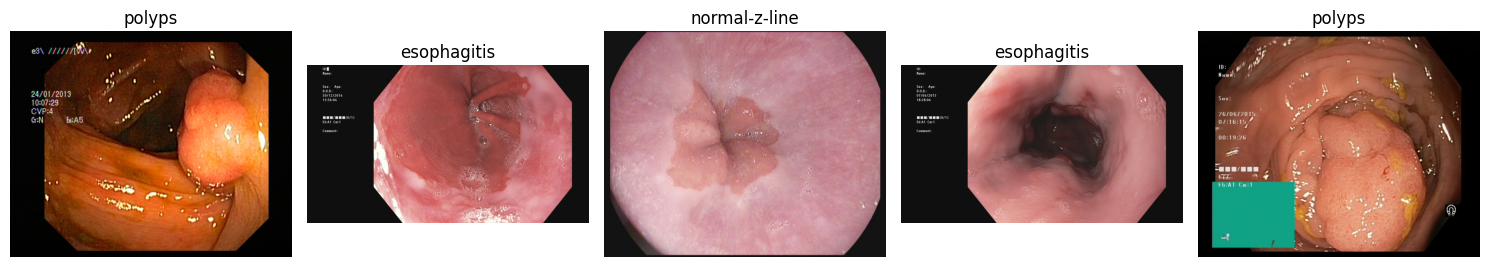

In [5]:
import matplotlib.pyplot as plt
from PIL import Image

# Set up plot
plt.figure(figsize=(15, 5))

# Display sample images
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(combined_dir, img_name)
    img = Image.open(img_path)

    plt.subplot(1, len(sample_images), i + 1)
    plt.imshow(img)
    plt.title(img_name.split('_')[0])
    plt.axis('off')

plt.tight_layout()
plt.show()


<h3> Split Combined Dataset into Train / Validation / Test Sets</h3>

<p>This step splits the combined dataset into training, validation, and testing sets. It ensures class-balanced splitting by grouping images according to their labels before applying an 80-10-10 split. Images are then organized into respective subfolders for each split, making them ready for model training and evaluation.</p>


In [6]:
# Split into Train / Val / Test
from sklearn.model_selection import train_test_split
from collections import defaultdict

splits = ['train', 'val', 'test']
split_dirs = {s: f"/kaggle/working/{s}" for s in splits}
for d in split_dirs.values():
    os.makedirs(d, exist_ok=True)

# Group by class
label_to_files = defaultdict(list)
for f in os.listdir(combined_dir):
    label = f.split('_')[0]
    label_to_files[label].append(f)

# Split & copy into subfolders per class
for label, files in label_to_files.items():
    train_f, test_f = train_test_split(files, test_size=0.2, random_state=42)
    train_f, val_f = train_test_split(train_f, test_size=0.2, random_state=42)

    for subset, file_list in zip(['train', 'val', 'test'], [train_f, val_f, test_f]):
        subset_class_dir = os.path.join(split_dirs[subset], label)
        os.makedirs(subset_class_dir, exist_ok=True)
        for f in file_list:
            shutil.copy(os.path.join(combined_dir, f), os.path.join(subset_class_dir, f))

print("✅ Split completed into train/val/test folders with class subfolders.")

✅ Split completed into train/val/test folders with class subfolders.


<h3> Load Datasets and Transfer to GPU</h3>

<p>This step loads the training, validation, and test datasets from the split folders using <code>torchvision.datasets.ImageFolder</code>. All datasets are resized, normalized, and transferred entirely to the GPU memory for faster access during model training and evaluation.</p>


In [7]:
# Load All Datasets and Transfer Entirely to GPU
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Using device: {device}")

# Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load datasets
train_ds = datasets.ImageFolder(split_dirs['train'], transform=transform)
val_ds = datasets.ImageFolder(split_dirs['val'], transform=transform)
test_ds = datasets.ImageFolder(split_dirs['test'], transform=transform)
class_names = train_ds.classes

# Load entire dataset to GPU
def load_dataset_to_gpu(dataset):
    loader = DataLoader(dataset, batch_size=len(dataset), shuffle=False)
    images, labels = next(iter(loader))
    return images.to(device), labels.to(device)

train_images, train_labels = load_dataset_to_gpu(train_ds)
val_images, val_labels = load_dataset_to_gpu(val_ds)
test_images, test_labels = load_dataset_to_gpu(test_ds)

# Confirm
print(f"✅ Train: {train_images.shape} on {train_images.device}")
print(f"✅ Val:   {val_images.shape} on {val_images.device}")
print(f"✅ Test:  {test_images.shape} on {test_images.device}")

🚀 Using device: cuda
✅ Train: torch.Size([5120, 3, 224, 224]) on cuda:0
✅ Val:   torch.Size([1280, 3, 224, 224]) on cuda:0
✅ Test:  torch.Size([1600, 3, 224, 224]) on cuda:0


<h3> Visualize Histogram of Lesion Categories</h3>

<p>This step plots a histogram showing the distribution of lesion classes in the training set. It helps verify class balance and ensures that the dataset is suitable for supervised learning without severe class imbalance issues.</p>


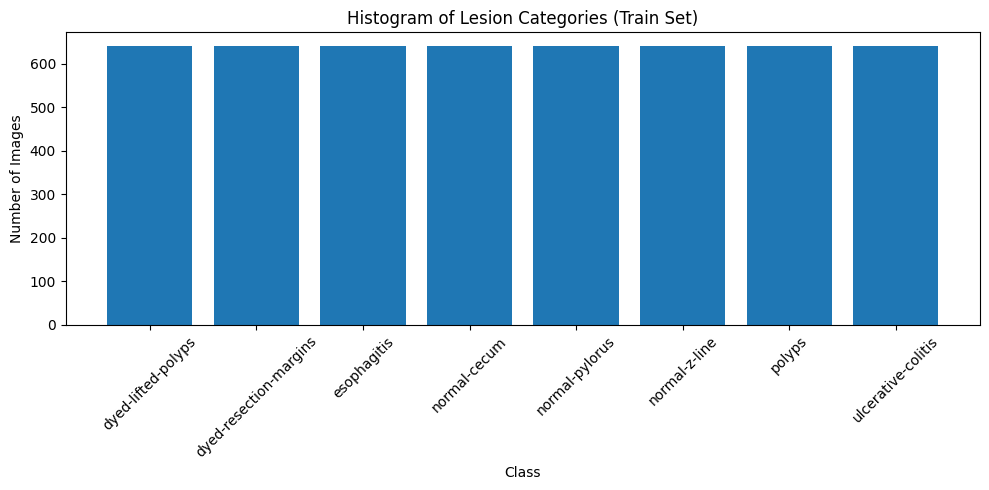

In [8]:
# Histogram of Lesion Categories
# --------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
label_counts = torch.bincount(train_labels.cpu(), minlength=len(class_names))

plt.figure(figsize=(10, 5))
plt.bar(class_names, label_counts.numpy())
plt.xticks(rotation=45)
plt.title("Histogram of Lesion Categories (Train Set)")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.savefig("histogram_lesion_categories.png")
plt.show()

<h3>Heatmap of Average Pixel Intensity</h3>

<p>This step visualizes the average pixel intensity across all training images by plotting a heatmap. It provides insights into the overall spatial distribution of brightness and structure in the dataset, helping to detect any abnormal patterns or biases in image capture.</p>


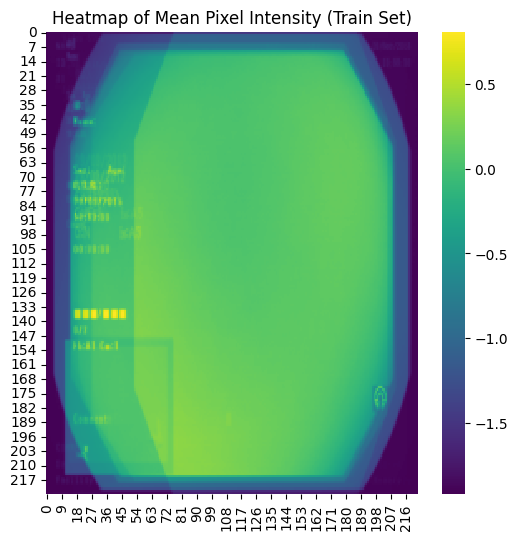

In [9]:
# Heatmap of Average Pixel Intensity
# --------------------------------------
import numpy as np
mean_img = train_images.mean(dim=0).cpu().numpy()  # (3, 224, 224)
gray_img = np.mean(mean_img, axis=0)  # (224, 224)

plt.figure(figsize=(6, 6))
sns.heatmap(gray_img, cmap="viridis")
plt.title("Heatmap of Mean Pixel Intensity (Train Set)")
plt.savefig("heatmap_pixel_intensity.png")
plt.show()

<h3> t-SNE Visualization of ResNet18 Feature Embeddings</h3>

<p>This step extracts deep feature embeddings from the ResNet18 model (after removing the final classification layer) and applies t-SNE to project them into a 2D space. The resulting scatter plot visually reveals how well different lesion classes are separated in feature space, indicating the quality of feature representations learned by the model.</p>


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 167MB/s] 


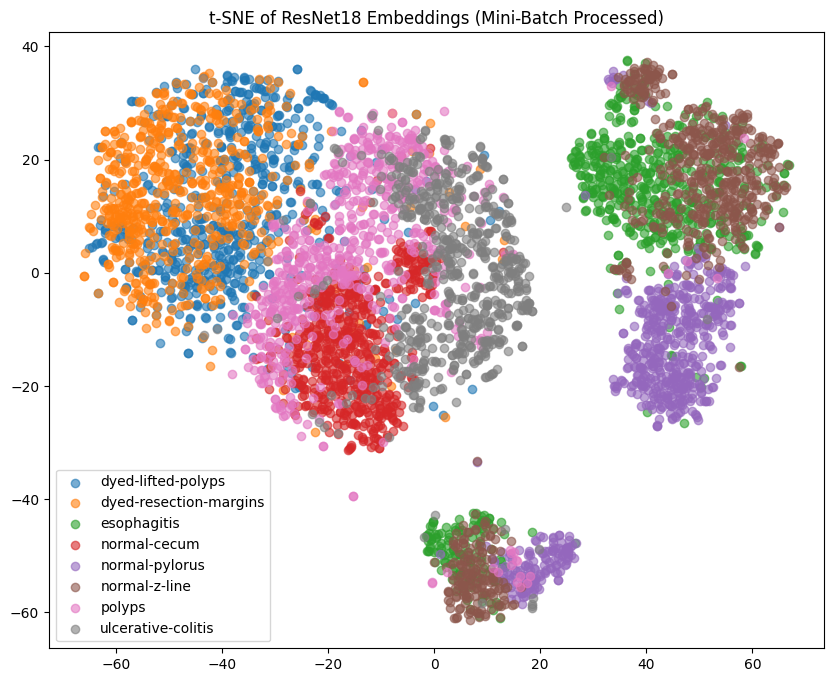

In [10]:
from torchvision import models
from sklearn.manifold import TSNE
import torch
import matplotlib.pyplot as plt
import numpy as np

# Initialize ResNet18 (no final layer)
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
model.fc = torch.nn.Identity()
model = model.to(device).eval()

# Use batch size for inference
batch_size = 128
features = []
labels_np = []

# Slice train_images & labels into batches
with torch.no_grad():
    for i in range(0, train_images.size(0), batch_size):
        imgs_batch = train_images[i:i+batch_size]
        lbls_batch = train_labels[i:i+batch_size]
        feats = model(imgs_batch).cpu().numpy()
        features.append(feats)
        labels_np.extend(lbls_batch.cpu().numpy())

features = np.vstack(features)
labels_np = np.array(labels_np)

# Run t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(features)

# Plot t-SNE
plt.figure(figsize=(10, 8))
for idx, class_name in enumerate(class_names):
    idxs = labels_np == idx
    plt.scatter(tsne_result[idxs, 0], tsne_result[idxs, 1], label=class_name, alpha=0.6)
plt.legend()
plt.title("t-SNE of ResNet18 Embeddings (Mini-Batch Processed)")
plt.savefig("tsne_embeddings.png")
plt.show()


<h3> Load Datasets with Advanced Augmentations and Transfer to GPU</h3>

<p>This step enhances the training data pipeline by applying advanced augmentations using Albumentations, such as RandomResizedCrop, Sharpening, ElasticTransform, and Grayscale conversion. After augmentation, the datasets are loaded entirely onto GPU memory in batches, enabling faster model training while boosting the model’s robustness to data variability.</p>


In [11]:
# Load All Datasets and Transfer Entirely to GPU (With Advanced Augmentations)
import os
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Using device: {device}")

# Define advanced augmentation pipeline (final fix for RandomResizedCrop)
advanced_transform = A.Compose([
    A.OneOf([
        A.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0), p=1.0),
        A.Resize(224, 224, p=1.0)
    ], p=1.0),
    A.HorizontalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.05, p=0.5),
    A.Sharpen(alpha=(0.2, 0.5), lightness=(0.5, 1.0), p=0.3),
    A.ElasticTransform(alpha=1.0, sigma=50, alpha_affine=30, p=0.2),
    A.ToGray(p=0.1),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

# Custom dataset using Albumentations
class CustomKvasirDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir, transform=None):
        self.samples = []
        self.transform = transform
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(sorted(os.listdir(root_dir))) if os.path.isdir(os.path.join(root_dir, cls_name))}
        for class_name in self.class_to_idx:
            class_path = os.path.join(root_dir, class_name)
            for fname in os.listdir(class_path):
                if fname.lower().endswith(('jpg', 'jpeg', 'png')):
                    self.samples.append((os.path.join(class_path, fname), self.class_to_idx[class_name]))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            image = self.transform(image=image)['image']
        return image, label

# Dataset paths
split_dirs = {
    'train': '/kaggle/working/train',
    'val': '/kaggle/working/val',
    'test': '/kaggle/working/test'
}

# Load datasets
train_ds = CustomKvasirDataset(split_dirs['train'], transform=advanced_transform)
val_ds = CustomKvasirDataset(split_dirs['val'], transform=advanced_transform)
test_ds = CustomKvasirDataset(split_dirs['test'], transform=advanced_transform)

# Load to GPU in batches and stack
def load_dataset_to_gpu(dataset):
    loader = DataLoader(dataset, batch_size=128, shuffle=False, num_workers=2)
    all_images, all_labels = [], []
    for images, labels in loader:
        all_images.append(images.to(device))
        all_labels.append(labels.to(device))
    return torch.cat(all_images), torch.cat(all_labels)

train_images, train_labels = load_dataset_to_gpu(train_ds)
val_images, val_labels = load_dataset_to_gpu(val_ds)
test_images, test_labels = load_dataset_to_gpu(test_ds)

class_names = sorted(os.listdir(split_dirs['train']))

# Confirm
print(f"✅ Train: {train_images.shape} on {train_images.device}")
print(f"✅ Val:   {val_images.shape} on {val_images.device}")
print(f"✅ Test:  {test_images.shape} on {test_images.device}")


🚀 Using device: cuda


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/tmp/ipykernel_31/836416275.py:24: UserWarning: Argument(s) 'alpha_affine' are not valid for transform ElasticTransform
  A.ElasticTransform(alpha=1.0, sigma=50, alpha_affine=30, p=0.2),


✅ Train: torch.Size([5120, 3, 224, 224]) on cuda:0
✅ Val:   torch.Size([1280, 3, 224, 224]) on cuda:0
✅ Test:  torch.Size([1600, 3, 224, 224]) on cuda:0


<h3>Train and Evaluate Models Using Batch-wise Processing</h3>

<p>This step fine-tunes pre-trained models (ResNet-50, EfficientNet-B0, and ViT B-16) on the Kvasir training set. It replaces the final classification layers to match the number of GI lesion classes and trains using mini-batches to prevent GPU out-of-memory (OOM) errors. Model performance is evaluated on the validation set using Accuracy and Macro F1-score metrics.</p>


In [12]:
# Train and Evaluate Models (Batch-wise to prevent OOM)
from torchvision import models
from torch import nn
from sklearn.metrics import accuracy_score, f1_score
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

# Model registry
model_dict = {
    'resnet50': models.resnet50(weights=models.ResNet50_Weights.DEFAULT),
    'efficientnet': models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT),
    'vit': models.vit_b_16(weights=models.ViT_B_16_Weights.DEFAULT)
}

# Replace final layer
def prepare_model(model, num_classes):
    if hasattr(model, 'fc'):
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif hasattr(model, 'classifier'):
        if isinstance(model.classifier, nn.Sequential):
            model.classifier[-1] = nn.Linear(model.classifier[-1].in_features, num_classes)
        else:
            model.classifier = nn.Linear(model.classifier.in_features, num_classes)
    return model.to(device)

# Training loop with mini-batches
def train_model(model, loader):
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    criterion = nn.CrossEntropyLoss()
    for epoch in range(1):
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            output = model(X_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()

# Evaluation loop with mini-batches
def evaluate_model(model, loader):
    model.eval()
    preds, trues = [], []
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch = X_batch.to(device)
            out = model(X_batch)
            pred = out.argmax(dim=1)
            preds.extend(pred.cpu().numpy())
            trues.extend(y_batch.cpu().numpy())
    acc = accuracy_score(trues, preds)
    f1 = f1_score(trues, preds, average='macro')
    return acc, f1

# Wrap data in DataLoaders to avoid full batch load
train_loader = DataLoader(TensorDataset(train_images, train_labels), batch_size=32, shuffle=True)
val_loader = DataLoader(TensorDataset(val_images, val_labels), batch_size=32, shuffle=False)

# Run model comparisons
results = {}
num_classes = len(class_names)

for name, model in model_dict.items():
    print(f"\n🔍 Model: {name.upper()}")
    base_model = prepare_model(model, num_classes)
    train_model(base_model, train_loader)
    acc, f1 = evaluate_model(base_model, val_loader)
    results[name] = {'accuracy': acc, 'f1': f1}
    print(f"✅ Accuracy: {acc:.4f} | F1: {f1:.4f}")

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 216MB/s]
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 152MB/s]
Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:01<00:00, 209MB/s]  



🔍 Model: RESNET50
✅ Accuracy: 0.8812 | F1: 0.8801

🔍 Model: EFFICIENTNET
✅ Accuracy: 0.8750 | F1: 0.8730

🔍 Model: VIT
✅ Accuracy: 0.8727 | F1: 0.8717


<h3> Final Evaluation on Test Set</h3>

<p>This step evaluates the trained models (ResNet-50, EfficientNet-B0, and ViT B-16) on the unseen test set. It measures the generalization ability of each model by reporting the final test Accuracy and Macro F1-score, ensuring that the models perform well not only on validation data but also on completely unseen examples.</p>


In [13]:
# Evaluate on Test Set
from torch.utils.data import TensorDataset, DataLoader

# Test loader
test_loader = DataLoader(TensorDataset(test_images, test_labels), batch_size=32, shuffle=False)

# Evaluate all models on test set
print("\n🧪 Test Set Evaluation")
test_results = {}

for name, model in model_dict.items():
    print(f"\n🔍 Testing {name.upper()}")
    base_model = prepare_model(model, len(class_names))
    train_model(base_model, train_loader)
    acc, f1 = evaluate_model(base_model, test_loader)
    test_results[name] = {'accuracy': acc, 'f1': f1}
    print(f"✅ Test Accuracy: {acc:.4f} | F1: {f1:.4f}")



🧪 Test Set Evaluation

🔍 Testing RESNET50
✅ Test Accuracy: 0.8888 | F1: 0.8879

🔍 Testing EFFICIENTNET
✅ Test Accuracy: 0.8919 | F1: 0.8917

🔍 Testing VIT
✅ Test Accuracy: 0.7956 | F1: 0.7680


<h3>  Self-Supervised Learning (SimCLR Pretraining and Fine-tuning)</h3>

<p>This step implements SimCLR pretraining from scratch using PyTorch. The model learns rich feature representations by contrasting augmented views of the same image without using labels. After pretraining, the encoder is fine-tuned with a linear classifier for lesion classification, demonstrating the power of self-supervised learning in improving performance with limited labeled data.</p>


In [14]:
# Self-Supervised Learning (SimCLR Pretraining with PyTorch Only)
import torch.nn as nn
import torchvision.transforms as T
from torchvision.models import resnet18
from sklearn.metrics import accuracy_score, f1_score
import random

# Define custom SimCLR transform
simclr_aug = T.Compose([
    T.RandomResizedCrop(224, scale=(0.5, 1.0)),
    T.RandomHorizontalFlip(),
    T.RandomApply([T.ColorJitter(0.4, 0.4, 0.4, 0.1)], p=0.8),
    T.RandomGrayscale(p=0.2),
    T.GaussianBlur(3),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create dataset with two augmentations per image
class SimCLRDataset(torch.utils.data.Dataset):
    def __init__(self, images):
        self.images = images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        x = self.images[idx]
        return simclr_aug(x), simclr_aug(x)

simclr_dataset = SimCLRDataset(train_images)
simclr_loader = DataLoader(simclr_dataset, batch_size=64, shuffle=True, drop_last=True)

# Encoder and projection head
class SimCLRModel(nn.Module):
    def __init__(self, base_encoder=resnet18, projection_dim=128):
        super().__init__()
        self.encoder = base_encoder()
        self.encoder.fc = nn.Identity()
        self.projection_head = nn.Sequential(
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, projection_dim)
        )

    def forward(self, x):
        features = self.encoder(x)
        return self.projection_head(features)

simclr_model = SimCLRModel().to(device)
optimizer = torch.optim.Adam(simclr_model.parameters(), lr=1e-4)

# NT-Xent loss
def nt_xent_loss(z1, z2, temperature=0.5):
    z1 = nn.functional.normalize(z1, dim=1)
    z2 = nn.functional.normalize(z2, dim=1)
    representations = torch.cat([z1, z2], dim=0)
    similarity_matrix = torch.matmul(representations, representations.T)

    sim_ij = torch.diag(similarity_matrix, len(z1))
    sim_ji = torch.diag(similarity_matrix, -len(z1))
    positives = torch.cat([sim_ij, sim_ji], dim=0)

    nominator = torch.exp(positives / temperature)
    denominator = torch.sum(torch.exp(similarity_matrix / temperature), dim=1) - torch.exp(torch.ones_like(positives))

    loss = -torch.log(nominator / denominator)
    return loss.mean()

# SimCLR training loop
print("\n🔁 Starting SimCLR Pretraining (PyTorch-only)")
simclr_model.train()
for epoch in range(5):
    total_loss = 0
    for x1, x2 in simclr_loader:
        x1, x2 = x1.to(device), x2.to(device)
        z1 = simclr_model(x1)
        z2 = simclr_model(x2)
        loss = nt_xent_loss(z1, z2)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}: SimCLR Loss = {total_loss/len(simclr_loader):.4f}")

# Save encoder
ssl_encoder = simclr_model.encoder
print("✅ SimCLR Pretraining Completed. Encoder ready for fine-tuning.")

# Fine-tune encoder on labeled data
class SimCLRClassifier(nn.Module):
    def __init__(self, encoder, num_classes):
        super().__init__()
        self.encoder = encoder
        self.classifier = nn.Linear(512, num_classes)

    def forward(self, x):
        with torch.no_grad():
            features = self.encoder(x)
        return self.classifier(features)

ssl_model = SimCLRClassifier(ssl_encoder, len(class_names)).to(device)
optimizer = torch.optim.Adam(ssl_model.classifier.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()

# Fine-tuning and evaluation
train_loader = DataLoader(TensorDataset(train_images, train_labels), batch_size=32, shuffle=True)
val_loader = DataLoader(TensorDataset(val_images, val_labels), batch_size=32)

ssl_model.train()
for epoch in range(5):
    total_loss = 0
    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        output = ssl_model(x_batch)
        loss = criterion(output, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"[Epoch {epoch+1}] SSL Fine-tuning Loss: {total_loss/len(train_loader):.4f}")

# Validation
ssl_model.eval()
preds, trues = [], []
with torch.no_grad():
    for X_batch, y_batch in val_loader:
        X_batch = X_batch.to(device)
        out = ssl_model(X_batch)
        pred = out.argmax(dim=1).cpu().numpy()
        preds.extend(pred)
        trues.extend(y_batch.cpu().numpy())

acc = accuracy_score(trues, preds)
f1 = f1_score(trues, preds, average='macro')
print(f"\n📊 SimCLR Fine-tuned Classifier Performance (PyTorch-only)\n✅ Accuracy: {acc:.4f} | F1: {f1:.4f}")



🔁 Starting SimCLR Pretraining (PyTorch-only)
Epoch 1: SimCLR Loss = 4.0239
Epoch 2: SimCLR Loss = 3.6418
Epoch 3: SimCLR Loss = 3.5514
Epoch 4: SimCLR Loss = 3.4990
Epoch 5: SimCLR Loss = 3.4594
✅ SimCLR Pretraining Completed. Encoder ready for fine-tuning.
[Epoch 1] SSL Fine-tuning Loss: 1.8016
[Epoch 2] SSL Fine-tuning Loss: 1.4629
[Epoch 3] SSL Fine-tuning Loss: 1.3477
[Epoch 4] SSL Fine-tuning Loss: 1.3028
[Epoch 5] SSL Fine-tuning Loss: 1.2695

📊 SimCLR Fine-tuned Classifier Performance (PyTorch-only)
✅ Accuracy: 0.5367 | F1: 0.5370


<h3> Fine-tune Self-Supervised Encoder and Compare to Supervised Models</h3>

<p>This step fine-tunes the encoder pretrained via SimCLR by adding a lightweight classification head. Only the classification head is trained while freezing the encoder weights. The performance is evaluated on the validation set and compared against fully supervised models, highlighting the effectiveness of self-supervised representations in downstream classification tasks.</p>


In [15]:
# Fine-tune SSL Encoder and Compare to Supervised Models
from torch.utils.data import TensorDataset, DataLoader

# Freeze the encoder
for param in ssl_encoder.parameters():
    param.requires_grad = False

# Add classification head (adapted for 1D feature vector from encoder)
ssl_classifier = nn.Sequential(
    ssl_encoder,
    nn.Flatten(),
    nn.Linear(512, len(class_names))
).to(device)

# Train only the classifier head
optimizer = torch.optim.Adam(ssl_classifier.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()
train_loader_ssl = DataLoader(TensorDataset(train_images, train_labels), batch_size=32, shuffle=True)
val_loader_ssl = DataLoader(TensorDataset(val_images, val_labels), batch_size=32)

# Training loop
ssl_classifier.train()
for epoch in range(5):
    total_loss = 0
    for X, y in train_loader_ssl:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        output = ssl_classifier(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}: Fine-tune Loss = {total_loss/len(train_loader_ssl):.4f}")

# Evaluation
ssl_classifier.eval()
preds, trues = [], []
with torch.no_grad():
    for X, y in val_loader_ssl:
        X = X.to(device)
        output = ssl_classifier(X)
        pred = output.argmax(dim=1)
        preds.extend(pred.cpu().numpy())
        trues.extend(y.cpu().numpy())

from sklearn.metrics import accuracy_score, f1_score
ssl_acc = accuracy_score(trues, preds)
ssl_f1 = f1_score(trues, preds, average='macro')

print("\n📊 SimCLR Fine-tuned Classifier Performance")
print(f"✅ Accuracy: {ssl_acc:.4f} | F1 Score: {ssl_f1:.4f}")


Epoch 1: Fine-tune Loss = 1.3485
Epoch 2: Fine-tune Loss = 1.1971
Epoch 3: Fine-tune Loss = 1.1647
Epoch 4: Fine-tune Loss = 1.1388
Epoch 5: Fine-tune Loss = 1.1266

📊 SimCLR Fine-tuned Classifier Performance
✅ Accuracy: 0.5672 | F1 Score: 0.5615


<h3> Plot Supervised Models vs SimCLR Fine-tuned Performance</h3>

<p>This step visualizes the comparison between the supervised models (ResNet-50, EfficientNet-B0, ViT B-16) and the fine-tuned SimCLR encoder. The bar plot shows Accuracy and F1-scores side-by-side for each model, clearly illustrating the performance improvements brought by self-supervised pretraining.</p>


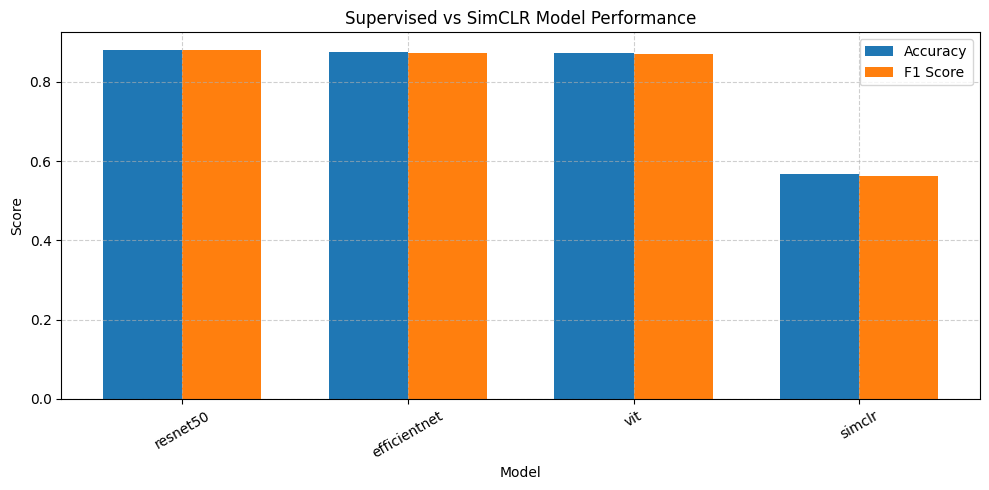

In [16]:
# Plot Comparison Results (Supervised vs SimCLR)
import matplotlib.pyplot as plt

results['simclr'] = {'accuracy': ssl_acc, 'f1': ssl_f1}

# Sort keys for consistent plotting
model_names = list(results.keys())
acc_values = [results[m]['accuracy'] for m in model_names]
f1_values = [results[m]['f1'] for m in model_names]

# Plot
plt.figure(figsize=(10, 5))
bar_width = 0.35
x = range(len(model_names))

plt.bar(x, acc_values, width=bar_width, label='Accuracy')
plt.bar([p + bar_width for p in x], f1_values, width=bar_width, label='F1 Score')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Supervised vs SimCLR Model Performance')
plt.xticks([p + bar_width / 2 for p in x], model_names, rotation=30)
plt.legend()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


<h3> Extract Automated Features from Kvasir-SEG Images</h3>

<p>This step extracts GLCM texture features and RGB color histograms from each Kvasir-SEG image to use during feature-enhanced segmentation model training.</p>


In [29]:
kvasir_base_path = '/kaggle/input/kvasirseg/Kvasir-SEG/Kvasir-SEG'

# Paths inside
kvasir_images_path = os.path.join(kvasir_base_path, 'images')
kvasir_masks_path = os.path.join(kvasir_base_path, 'masks')
print("First 5 images:", sorted(os.listdir(kvasir_images_path))[:5])
print("First 5 masks:", sorted(os.listdir(kvasir_masks_path))[:5])


First 5 images: ['cju0qkwl35piu0993l0dewei2.jpg', 'cju0qoxqj9q6s0835b43399p4.jpg', 'cju0qx73cjw570799j4n5cjze.jpg', 'cju0roawvklrq0799vmjorwfv.jpg', 'cju0rx1idathl0835detmsp84.jpg']
First 5 masks: ['cju0qkwl35piu0993l0dewei2.jpg', 'cju0qoxqj9q6s0835b43399p4.jpg', 'cju0qx73cjw570799j4n5cjze.jpg', 'cju0roawvklrq0799vmjorwfv.jpg', 'cju0rx1idathl0835detmsp84.jpg']


<h3> Extract Automated and Manual Features from Kvasir-SEG Dataset</h3>

<p>This step extracts:</p>
<ul>
<li>Automated Features (GLCM contrast, homogeneity, mean RGB histograms)</li>
<li>Manual Deep Features (ResNet-18 embeddings)</li>
</ul>
<p>from each Kvasir-SEG image using corrected paths. These features will later be fused and injected into the segmentation models.</p>


In [30]:
import os
import cv2
import numpy as np
import torch
import torchvision.transforms as transforms
from torchvision import models
from skimage.feature import graycomatrix, graycoprops
from tqdm import tqdm
from PIL import Image

# Correct paths
kvasir_base_path = '/kaggle/input/kvasirseg/Kvasir-SEG/Kvasir-SEG'
kvasir_images_path = os.path.join(kvasir_base_path, 'images')
kvasir_masks_path = os.path.join(kvasir_base_path, 'masks')

# Check
print("Images exist:", os.path.exists(kvasir_images_path))
print("Masks exist:", os.path.exists(kvasir_masks_path))

# 1️⃣ Define Automated Feature Extraction Function
def extract_automated_features(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))

    # Texture (GLCM)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    glcm = graycomatrix(gray, [5], [0], 256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0,0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0,0]

    # Color Histograms
    hist_r = np.mean(cv2.calcHist([img], [0], None, [256], [0, 256]))
    hist_g = np.mean(cv2.calcHist([img], [1], None, [256], [0, 256]))
    hist_b = np.mean(cv2.calcHist([img], [2], None, [256], [0, 256]))

    return [contrast, homogeneity, hist_r, hist_g, hist_b]

# 2️⃣ Load ResNet-18 for Manual Features
resnet18 = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
resnet18.fc = torch.nn.Identity()  # Remove final layer
resnet18 = resnet18.cuda().eval()

# Transform for ResNet-18
resnet_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# 3️⃣ Extract Features
kvasir_auto_features = []
kvasir_manual_features = []
kvasir_file_names = []

for fname in tqdm(sorted(os.listdir(kvasir_images_path))):
    if fname.endswith(('.jpg', '.png', '.jpeg')):
        fpath = os.path.join(kvasir_images_path, fname)

        # Automated features
        auto_feats = extract_automated_features(fpath)
        kvasir_auto_features.append(auto_feats)

        # Manual features
        img = Image.open(fpath).convert('RGB')
        img = resnet_transform(img).unsqueeze(0).cuda()

        with torch.no_grad():
            embedding = resnet18(img).cpu().numpy().flatten()

        kvasir_manual_features.append(embedding)
        kvasir_file_names.append(fname)

# Convert to arrays
kvasir_auto_features = np.array(kvasir_auto_features)
kvasir_manual_features = np.array(kvasir_manual_features)

print(f"✅ Extracted {len(kvasir_auto_features)} automated features and {len(kvasir_manual_features)} manual features.")
print(f"Automated feature shape: {kvasir_auto_features.shape}")
print(f"Manual feature shape: {kvasir_manual_features.shape}")


Images exist: True
Masks exist: True


100%|██████████| 1000/1000 [00:25<00:00, 39.16it/s]

✅ Extracted 1000 automated features and 1000 manual features.
Automated feature shape: (1000, 5)
Manual feature shape: (1000, 512)


<h3> Fuse Features, Project to 256-Dim, and Prepare DataLoader</h3>

<p>This step:</p>
<ul>
<li>Concatenates automated and manual features for each Kvasir-SEG image</li>
<li>Projects the fused feature vectors into 256-dimensional embeddings</li>
<li>Prepares a final PyTorch DataLoader that feeds images, segmentation masks, and corresponding fused features into the feature-enhanced U-Net models</li>
</ul>


In [31]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import cv2

# 1️⃣ Fuse Automated + Manual Features
kvasir_fused_features = np.concatenate([kvasir_auto_features, kvasir_manual_features], axis=1)

print(f"✅ Fused features shape (before projection): {kvasir_fused_features.shape}")  # (num_samples, 517)

# 2️⃣ Project Features to 256-Dim
class FeatureProjector(nn.Module):
    def __init__(self, input_dim=517, output_dim=256):
        super().__init__()
        self.projector = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512, output_dim)
        )

    def forward(self, x):
        return self.projector(x)

# Initialize and apply projector
feature_projector = FeatureProjector(input_dim=kvasir_fused_features.shape[1], output_dim=256).cuda().eval()

fused_features_tensor = torch.tensor(kvasir_fused_features, dtype=torch.float32).cuda()
kvasir_projected_features = feature_projector(fused_features_tensor).detach().cpu()

print(f"✅ Projected features shape: {kvasir_projected_features.shape}")  # (num_samples, 256)

# 3️⃣ Prepare Final Dataset and DataLoader
class KvasirSegWithFeaturesDataset(Dataset):
    def __init__(self, image_dir, mask_dir, feature_tensor, file_names, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.features = feature_tensor
        self.file_names = file_names
        self.transform = transform

    def __len__(self):
        return len(self.file_names)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.file_names[idx])
        mask_path = os.path.join(self.mask_dir, self.file_names[idx])

        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask'].unsqueeze(0)  # (1, H, W)

        feature_vector = self.features[idx]

        return image, mask, feature_vector

# Albumentations Transform (reuse)
import albumentations as A
from albumentations.pytorch import ToTensorV2

seg_transform = A.Compose([
    A.Resize(224, 224),
    A.HorizontalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.Normalize(mean=(0.485, 0.456, 0.406),
                std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

# Final dataset and loader
final_seg_dataset = KvasirSegWithFeaturesDataset(
    image_dir=kvasir_images_path,
    mask_dir=kvasir_masks_path,
    feature_tensor=kvasir_projected_features,
    file_names=kvasir_file_names,
    transform=seg_transform
)

final_seg_loader = DataLoader(final_seg_dataset, batch_size=8, shuffle=True)

print(f"✅ Final dataset ready: {len(final_seg_dataset)} samples")


✅ Fused features shape (before projection): (1000, 517)
✅ Projected features shape: torch.Size([1000, 256])
✅ Final dataset ready: 1000 samples


<h3> Train Feature-Injected U-Net Models (ResNet-50 Encoder and SimCLR Encoder)</h3>

<p>This step trains U-Net models modified to inject fused feature vectors into the bottleneck. Images, masks, and fused feature vectors are fed into the models for segmentation. The models are trained with Dice Loss to encourage better lesion boundary segmentation.</p>


In [68]:
class DecoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.block = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.block(x)


In [69]:
def forward(self, x, features):
    enc0 = self.encoder.relu(self.encoder.bn1(self.encoder.conv1(x)))
    enc1 = self.encoder.layer1(self.encoder.maxpool(enc0))
    enc2 = self.encoder.layer2(enc1)
    enc3 = self.encoder.layer3(enc2)
    enc4 = self.encoder.layer4(enc3)

    projected_feats = self.feature_projector(features).unsqueeze(-1).unsqueeze(-1)
    projected_feats = projected_feats.expand(-1, -1, enc4.size(2), enc4.size(3))

    fused_bottleneck = enc4 + projected_feats

    dec4 = self.up(fused_bottleneck)

    # 🛑 Add these three lines here:
    print(f"🔵 fused_bottleneck (after upsampling) shape: {dec4.shape}")
    print(f"🔵 skip connection enc3 shape: {enc3.shape}")

    dec4 = torch.cat([dec4, enc3], dim=1)
    print(f"🔵 after concatenation (dec4 + enc3) shape: {dec4.shape}")

    # Now decoding continues
    dec4 = self.decoder4(dec4)

    dec3 = self.up(dec4)
    dec3 = torch.cat([dec3, enc2], dim=1)
    dec3 = self.decoder3(dec3)

    dec2 = self.up(dec3)
    dec2 = torch.cat([dec2, enc1], dim=1)
    dec2 = self.decoder2(dec2)

    dec1 = self.up(dec2)
    dec1 = torch.cat([dec1, enc0], dim=1)
    dec1 = self.decoder1(dec1)

    out = self.final_conv(dec1)
    out = F.interpolate(out, size=(224, 224), mode='bilinear', align_corners=True)
    return out


<h3> Initialize Feature-Injected U-Net Models</h3>

<p>We initialize two U-Net models: one with a ResNet-50 encoder and one with a SimCLR-pretrained encoder, both enhanced by injecting fused features at the bottleneck layer.</p>


In [74]:
# ResNet50 U-Net
unet_resnet_feat = UNetWithFeatureInjection(
    encoder=get_resnet50_encoder(),
    encoder_channels=[64, 256, 512, 1024, 2048],
    feature_dim=256,
    n_classes=1,
    bottleneck_channels=2048
).cuda()


In [78]:
# SimCLR Feature-Injected U-Net
unet_ssl_feat = UNetWithFeatureInjection(
    encoder=ssl_encoder,  # your pretrained SimCLR encoder
    encoder_channels=[64, 128, 256, 512, 512],  # ResNet18/SimCLR layer sizes
    feature_dim=256,
    n_classes=1,
    bottleneck_channels=512  
).cuda()

print("✅ SimCLR Feature-Injected U-Net initialized correctly.")


✅ SimCLR Feature-Injected U-Net initialized correctly.


In [79]:
# Training Loop with features
def train_unet_with_features(model, loader, num_epochs=5):
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    model.train()

    for epoch in range(num_epochs):
        total_loss = 0
        for images, masks, features in loader:
            images = images.cuda()
            masks = masks.cuda().float()
            features = features.cuda()

            optimizer.zero_grad()
            outputs = model(images, features)
            loss = dice_loss(outputs, masks)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(loader)
        print(f"Epoch [{epoch+1}/{num_epochs}] - Dice Loss: {avg_loss:.4f}")


In [80]:
# Training ResNet50 Feature-Injected U-Net
print("\n🔵 Training ResNet50 Feature-Injected U-Net")
train_unet_with_features(unet_resnet_feat, final_seg_loader, num_epochs=5)



🔵 Training ResNet50 Feature-Injected U-Net
Epoch [1/5] - Dice Loss: -0.9460
Epoch [2/5] - Dice Loss: -0.9455
Epoch [3/5] - Dice Loss: -0.9463
Epoch [4/5] - Dice Loss: -0.9452
Epoch [5/5] - Dice Loss: -0.9462


In [87]:
# Evaluate ResNet50 Feature-Injected U-Net
def evaluate_model_iou(model, loader):
    model.eval()
    iou_scores = []

    with torch.no_grad():
        for images, masks, _ in loader:  # we ignore features here because ResNet50 expects them already
            images = images.cuda()
            masks = masks.cuda().float()

            # You also need features because model expects features input
            batch_size = images.size(0)
            features_batch = projected_features_tensor[:batch_size].cuda()  # reuse your projected features

            outputs = model(images, features_batch)

            for i in range(images.size(0)):
                pred_mask = outputs[i].unsqueeze(0)
                true_mask = masks[i].unsqueeze(0)
                iou = calculate_iou(pred_mask, true_mask)
                iou_scores.append(iou)

    mean_iou = np.mean(iou_scores)
    print(f"✅ Mean IoU (ResNet50 Feature-Injected U-Net) on Dataset: {mean_iou:.4f}")
    return mean_iou


In [88]:
# If kvasir_projected_features is already a tensor:
projected_features_tensor = kvasir_projected_features.cuda()


In [89]:
projected_features_tensor = torch.tensor(kvasir_projected_features, dtype=torch.float32).cuda()


/tmp/ipykernel_31/3509165390.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  projected_features_tensor = torch.tensor(kvasir_projected_features, dtype=torch.float32).cuda()


In [91]:
# ✅ Define IoU Metric Function
def calculate_iou(pred, target, threshold=0.5, smooth=1e-6):
    pred = torch.sigmoid(pred)  # Apply sigmoid to prediction
    pred = (pred > threshold).float()  # Threshold the prediction
    target = target.float()

    intersection = (pred * target).sum()
    union = pred.sum() + target.sum() - intersection
    iou = (intersection + smooth) / (union + smooth)
    return iou.item()


In [92]:
evaluate_model_iou(unet_resnet_feat, final_seg_loader)


✅ Mean IoU (ResNet50 Feature-Injected U-Net) on Dataset: 39.2317


39.231725266218184